In [1]:
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read, normalize, and invert the image pixels
img = imageio.imread('./inputs/bitmap.pbm')
img = img // 255
img = cv2.bitwise_not(img)-254

n_pixels = img.shape[0] * img.shape[1]
print("Number of pixels:", n_pixels)
print("Image shape:",img.shape)
print("Unique values:",np.unique(img))

Number of pixels: 3068142
Image shape: (1374, 2233)
Unique values: [0 1]


In [3]:
n_white_pixels = np.count_nonzero(img)
n_black_pixels = n_pixels - n_white_pixels
print("# white pixels:", n_white_pixels, "# black pixels:", n_black_pixels, "Image shape:",img.shape)

# white pixels: 470254 # black pixels: 2597888 Image shape: (1374, 2233)


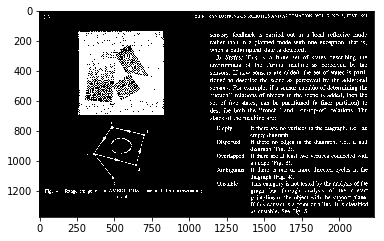

In [4]:
# Show binary image
plt.imshow(img, cmap="gray")
plt.show()

In [5]:
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(img)
vertical = np.copy(img)
print(np.unique(vertical))

[0 1]


In [6]:
# Define and create a horizontal structuring element to find words
horizontal_size = 12
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

In [7]:
# Apply morphology operations. Dilation and erosion
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)

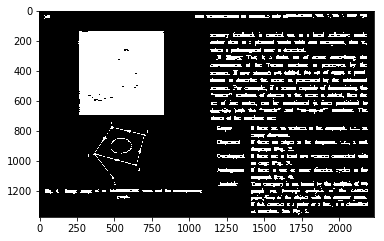

In [8]:
# show intermediate results
plt.imshow(horizontal, cmap="gray")
plt.show()

In [9]:
# Create structure element for extracting vertical lines (within words) through morphology operations
verticalsize = 4
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
# Apply morphology operations, dilation + erosion
vertical = cv2.dilate(vertical, verticalStructure)
vertical = cv2.erode(vertical, verticalStructure)

Pixel unique values: [0 1]


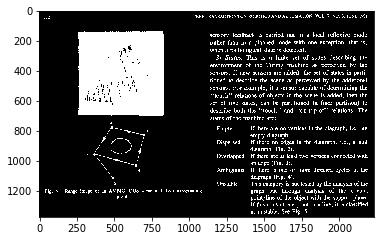

In [10]:
# dispaly results
plt.imshow(vertical, cmap="gray")
print("Pixel unique values:",np.unique(vertical))

In [11]:
# Merge and Close the final representation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 1))
merge = vertical * horizontal
closing = cv2.morphologyEx(merge, cv2.MORPH_CLOSE, kernel)

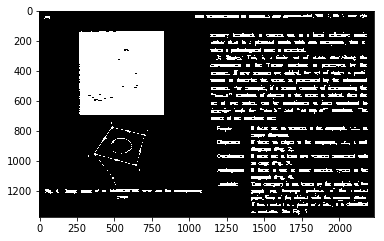

In [12]:
plt.imshow(closing, cmap="gray")
plt.show()

In [13]:
# Find connected components
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing)
print("# of boxes (word candidates):",nlabels)

# of boxes (word candidates): 316


In [14]:
def count_transitions(img):
  assert len(np.unique(img)) <= 2, "Image is not binary"
  black_pixel = 0

  # template: white --> black
  template = [1,0]
  
  row_length = img.shape[1]
  if row_length % 2 != 0:
    row_length = row_length-1  
   
  transitions = 0
  for row in img:
    for i in range(row_length):
      if np.all(template == row[i:i+2]):
        transitions+=1
  return transitions

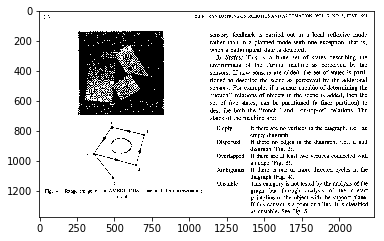

In [15]:
# reinvert pixels to compute features
img = cv2.bitwise_not(img)-254
plt.imshow(img, cmap="gray")
plt.show()

In [16]:
# transform image to rgb to draw bbxes
rgb = np.zeros((img.shape[0], img.shape[1], 3))
rgb[:,:,0] = img
rgb[:,:,1] = img
rgb[:,:,2] = img

In [17]:
n_words = 0

#  para cada retângulo envolvendo um objeto, calcule:
for box in stats:
    
    l = box[0]
    t = box[1]
    r = box[0] + box[2]
    b = box[1] + box[3]
    
    # get the bbox
    img_patch = closing[t:b,l:r]
    real_patch = img[t:b,l:r]
    n_pixels_box = img_patch.shape[0] * img_patch.shape[1]

    if (n_pixels_box / n_pixels) > 0.9:
      continue
    # razao entre o numero de pixels pretos e o numero total de pixels (altura × largura)
    # assumindo numero total de pixels do patch (box)
    # 0 --> black pixel
    # 1 --> white pixel
    
    n_white_pixels = np.count_nonzero(real_patch)
    n_black_pixels = n_pixels_box - n_white_pixels
    print("# white pixels:", n_white_pixels, "# black pixels:", n_black_pixels, "Image shape:",img_patch.shape)
    
    ht = count_transitions(real_patch)
    vt = count_transitions(real_patch.T)
                         
    pixel_ratio = n_black_pixels / n_pixels_box
    transition_ratio = (ht+vt)/n_pixels_box
    
    if (pixel_ratio >= 0.1 and pixel_ratio <= 0.62) and transition_ratio >= 0.068:
      n_words += 1
      cv2.rectangle(rgb,(l,t),(r,b),(0,255,0),2)
   

# white pixels: 3309 # black pixels: 1611 Image shape: (24, 205)
# white pixels: 858 # black pixels: 462 Image shape: (20, 66)
# white pixels: 400 # black pixels: 104 Image shape: (24, 21)
# white pixels: 569 # black pixels: 371 Image shape: (20, 47)
# white pixels: 358 # black pixels: 122 Image shape: (24, 20)
# white pixels: 569 # black pixels: 460 Image shape: (21, 49)
# white pixels: 1628 # black pixels: 1312 Image shape: (21, 140)
# white pixels: 694 # black pixels: 526 Image shape: (20, 61)
# white pixels: 784 # black pixels: 565 Image shape: (19, 71)
# white pixels: 455 # black pixels: 365 Image shape: (20, 41)
# white pixels: 2862 # black pixels: 1758 Image shape: (21, 220)
# white pixels: 615 # black pixels: 605 Image shape: (20, 61)
# white pixels: 514 # black pixels: 306 Image shape: (20, 41)
# white pixels: 1 # black pixels: 0 Image shape: (1, 1)
# white pixels: 52281 # black pixels: 268611 Image shape: (561, 572)
# white pixels: 2805 # black pixels: 1515 Image shape: (30, 

# white pixels: 1088 # black pixels: 623 Image shape: (29, 59)
# white pixels: 613 # black pixels: 423 Image shape: (28, 37)
# white pixels: 4706 # black pixels: 1991 Image shape: (37, 181)
# white pixels: 638 # black pixels: 322 Image shape: (32, 30)
# white pixels: 3938 # black pixels: 1723 Image shape: (37, 153)
# white pixels: 430 # black pixels: 320 Image shape: (25, 30)
# white pixels: 590 # black pixels: 466 Image shape: (24, 44)
# white pixels: 1925 # black pixels: 1004 Image shape: (29, 101)
# white pixels: 547 # black pixels: 553 Image shape: (20, 55)
# white pixels: 0 # black pixels: 1 Image shape: (1, 1)
# white pixels: 1 # black pixels: 0 Image shape: (1, 1)
# white pixels: 5291 # black pixels: 1549 Image shape: (38, 180)
# white pixels: 3006 # black pixels: 1554 Image shape: (30, 152)
# white pixels: 4 # black pixels: 12 Image shape: (4, 4)
# white pixels: 1112 # black pixels: 715 Image shape: (29, 63)
# white pixels: 2319 # black pixels: 1045 Image shape: (29, 116)
# whi

# white pixels: 189 # black pixels: 246 Image shape: (15, 29)
# white pixels: 1727 # black pixels: 763 Image shape: (30, 83)
# white pixels: 4536 # black pixels: 1626 Image shape: (39, 158)
# white pixels: 4 # black pixels: 12 Image shape: (4, 4)
# white pixels: 1149 # black pixels: 727 Image shape: (28, 67)
# white pixels: 758 # black pixels: 530 Image shape: (28, 46)
# white pixels: 2332 # black pixels: 1016 Image shape: (36, 93)
# white pixels: 7 # black pixels: 9 Image shape: (4, 4)
# white pixels: 595 # black pixels: 323 Image shape: (27, 34)
# white pixels: 746 # black pixels: 542 Image shape: (28, 46)
# white pixels: 2316 # black pixels: 1009 Image shape: (35, 95)
# white pixels: 5 # black pixels: 7 Image shape: (4, 3)
# white pixels: 2364 # black pixels: 1263 Image shape: (31, 117)
# white pixels: 1590 # black pixels: 654 Image shape: (33, 68)
# white pixels: 5 # black pixels: 11 Image shape: (4, 4)
# white pixels: 4 # black pixels: 8 Image shape: (4, 3)
# white pixels: 2335 # 

In [18]:
print("Number of words:",n_words)

Number of words: 244


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


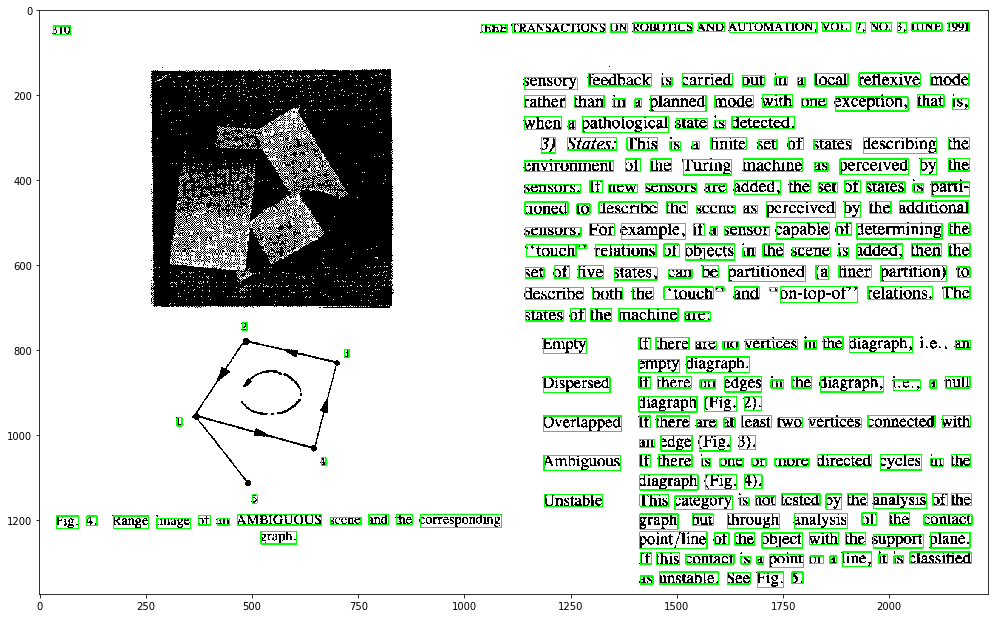

In [19]:
# This image has to be rbg to print colored boxes
plt.figure(figsize=(17,17))
plt.imshow(rgb)
plt.show()